In [1]:
function lagrange(x, y, xi)
    accsum = 0
    for i = 1:size(x,1)
        accpi = 1
        for j = 1:size(x,1)
            if i == j continue end
            accpi = accpi * (xi - x[j]) / (x[i] - x[j])  
        end
        accsum = accsum + accpi*y[i]
    end
    accsum
end

lagrange (generic function with 1 method)

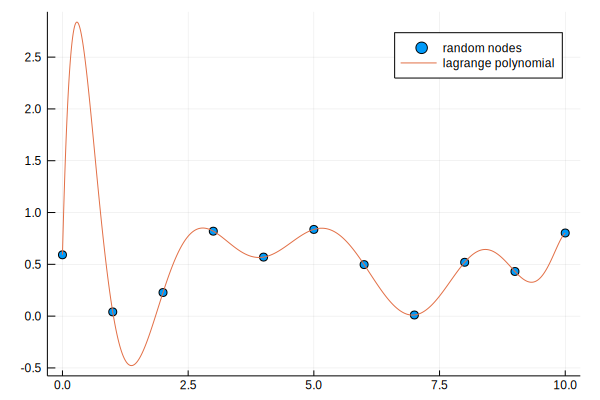

In [2]:
x =  0:10
y = [rand() for i in x]

xf = [i/1000 for i in 0:10000]
yf = [lagrange(x,y,i/1000) for i in 0:10000]

using Plots
scatter(x,y, label="random nodes")
plot!(xf,yf, label="lagrange polynomial")

In [3]:
function elems(x, y)
    a = y
    for i = 2:size(x,1)
        for j = size(x,1):(-1):(i)
            a[j] = (a[j] - a[j-1]) / (x[j] - x[j-(i-1)])
        end
    end
    a
end

elems (generic function with 1 method)

In [4]:
function newton(x, y, a, xi)
    accsum = a[1]
    
    for i = 1:size(x,1)-1
        accpi = a[i+1]
        for j = 1:i
            accpi = accpi * (xi - x[j])
        end
        accsum = accsum + accpi
    end
    accsum
end

newton (generic function with 1 method)

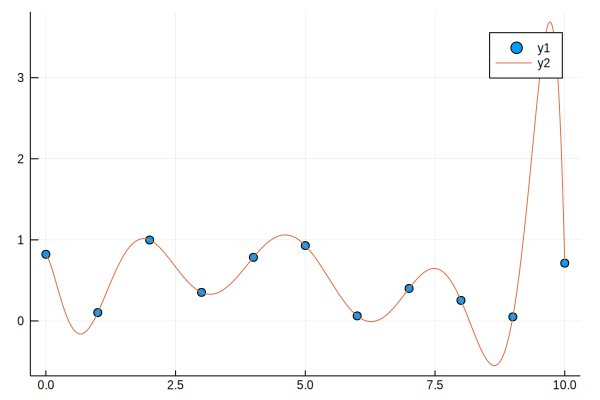

In [5]:
x =  0:10
y = [rand() for i in x]

using Plots
scatter(x,y)

a = elems(x,y)
xf = [i/1000 for i in 0:10000]
yf = [newton(x,y,a,i/1000) for i in 0:10000]


plot!(xf,yf)

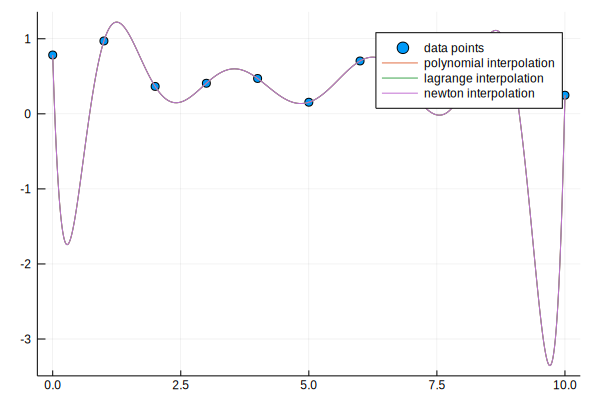

In [6]:
x =  0:10
y = [rand() for i in x]

using Plots
scatter(x,y, label="data points")

xp = 0:0.01:10

using Polynomials
fit1=polyfit(x, y)
yf=[fit1(i) for i in xp]
plot!(xp,yf, label="polynomial interpolation")

xf = [i/1000 for i in 0:10000]
yf = [lagrange(x,y,i/1000) for i in 0:10000]

plot!(xf,yf, label="lagrange interpolation")

a = elems(x,y)
xf = [i/1000 for i in 0:10000]
yf = [newton(x,y,a,i/1000) for i in 0:10000]


plot!(xf,yf, label="newton interpolation")

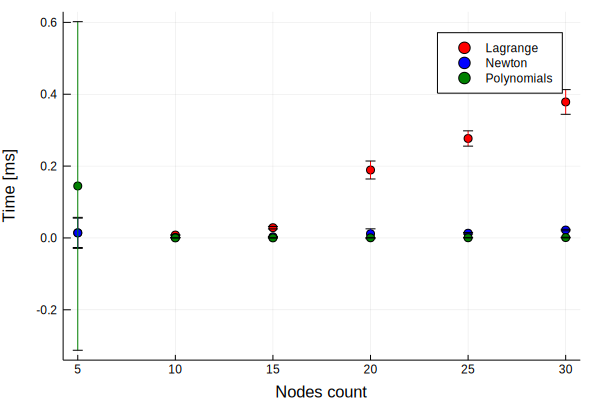

In [7]:
using DataFrames

df = DataFrame(Type = String[], N = Int64[], Time = Float64[])


for n = 5:5:30
    for t = 1:10
        x =  0:n
        y = [rand() for i in x]

        xp = 0:0.01:n
        using Polynomials

        time = @elapsed begin
            fit1=polyfit(x, y)
            yf=[fit1(i) for i in xp]
        end
        df2 = DataFrame(Type = "Polynomials", N = n, Time = time)

        append!(df,df2)

        time = @elapsed begin
            xf = [i/1000 for i in 0:10000]
            yf = [lagrange(x,y,i/1000) for i in 0:n*1000]
        end
        df2 = DataFrame(Type = "Lagrange", N = n, Time = time)

        append!(df,df2)
        time = @elapsed begin
            a = elems(x,y)
            xf = [i/1000 for i in 0:10000]
            yf = [newton(x,y,a,i/1000) for i in 0:n*1000]
        end
        df2 = DataFrame(Type = "Newton", N = n, Time = time)

        append!(df,df2)
    end
end

using Statistics
avg = by(df, [:Type, :N], Mean = :Time => mean, Std = :Time => std)

using Plots
scatter(avg[:N], avg[:Mean], group=avg[:Type], colour = [:red :blue :green], yerr=avg[:Std], xlabel="Nodes count", ylabel="Time [ms]")

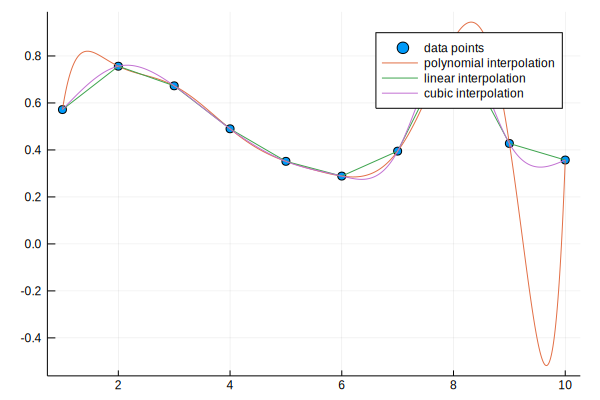

In [8]:
x =  1:1:10
y = [rand() for i in x]

using Plots
scatter(x,y, label="data points")
xp = 1:0.01:10

using Polynomials
fit1=polyfit(x, y)
yf=[fit1(i) for i in xp]
plot!(xp,yf, label="polynomial interpolation")

using Interpolations
interp_linear = LinearInterpolation(x, y)
yf=[interp_linear(i) for i in xp]
plot!(xp, yf, label="linear interpolation")

interp_cubic = CubicSplineInterpolation(x, y)
yf=[interp_cubic(i) for i in xp]
plot!(xp, yf, label="cubic interpolation")

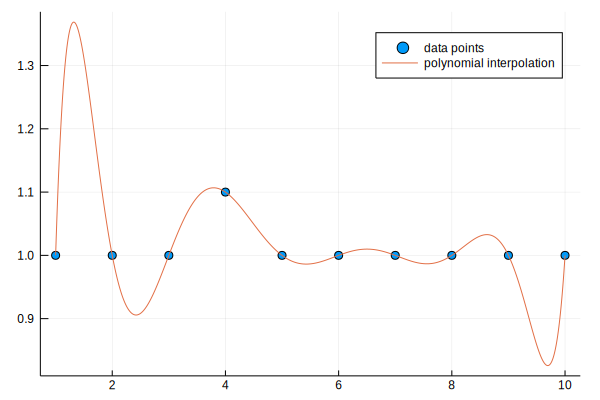

In [13]:
x =  1:1:10
y = [1.0 for i in x]
y[4] = 1.1
using Plots
scatter(x,y, label="data points")
xp = 1:0.01:10

using Polynomials
fit1=polyfit(x, y)
yf=[fit1(i) for i in xp]
plot!(xp,yf, label="polynomial interpolation")